In [108]:
%matplotlib inline
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

matplotlib.rcParams['figure.figsize'] = (20, 20)

In [5]:
all_data = pd.read_csv(
    'train.csv',
    index_col=0
)

In [43]:
all_X = all_data[['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7']]
all_y = all_data.y

In [45]:
all_data.dtypes

l0    float64
l1    float64
l2    float64
l3    float64
l4    float64
l5    float64
l6    float64
l7    float64
y       int64
dtype: object

In [44]:
all_data.shape

(4500, 9)

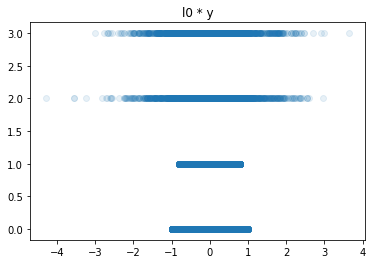

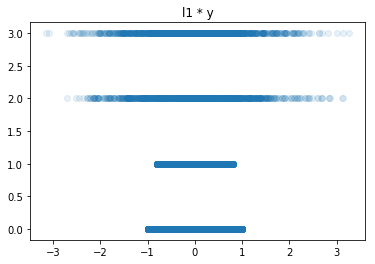

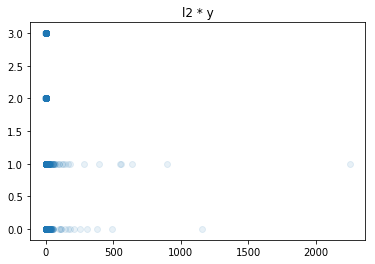

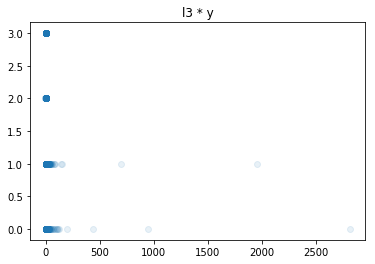

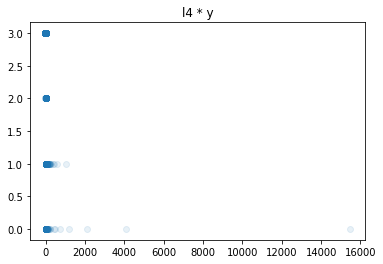

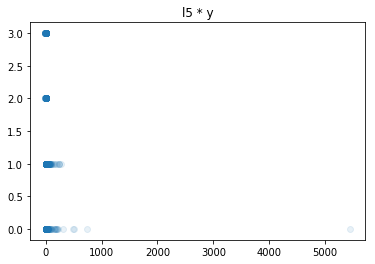

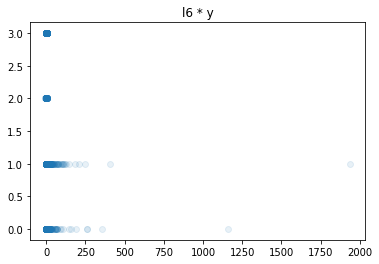

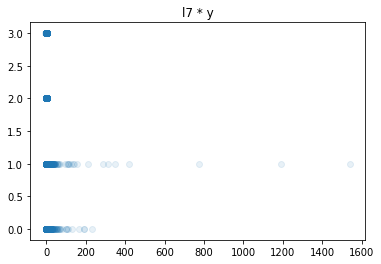

In [46]:
for col in ['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7']:
    plt.scatter(all_X[col], all_y, alpha=0.1)
    plt.title(f'{col} * y')
    plt.show()

In [110]:
def dist (point1, point2):
    a = 0
    for i in range(len(point1)):
        a = a + (point1[i] - point2[i])**2
    return math.sqrt(a)

In [104]:
test_data = pd.read_csv(
    'test_without_labels.csv',
    index_col=0
)

In [116]:
test_data.shape
all_data.iloc[0]

l0    1.034035
l1   -1.175951
l2   -0.323353
l3    0.881203
l4    0.479676
l5    1.063843
l6   -0.483735
l7   -1.326316
y     3.000000
Name: 0, dtype: float64

In [106]:
def classifyKNN (trainData, testData):
    testLabels = []
    for index, row in testData.iterrows():
        dist(row, trainData.iloc[index])
    return testLabels

In [109]:
classifyKNN(all_data, test_data)

9.021076406256833
25.13963289005919
63.32203292464776
1718.6366694597587
78.4387709523101
4541.315672713462
1421.7342197143967
5.23781759150246
394.75432199106257
2166.615092617263
15.818332618030345
36.51832716163376
138.3805840012073
432.2603077632892
24.66946574922793
2011.2930970201587
83.76902282019252
1268.9538500330045
1797.9642983974484
96.16891750188748
46.21289271285832
30.874387756923255
144.91314793943997
21860.059278992783
306.99562272342075
103.71354534306285
64.66646076337122
45.71971484833258
1299.728201860651
50.75088329185257
11.132620737304512
12.125171877344624
15.292183124057814
150.5126041017214
10.611867193437782
1306.7724072467354
32.12764883590613
69.75562147953693
11.100071280942782
25283.513469451726
108.25212721912999
16533.122365849482
463.64683584086055
338.1191245847083
26.541492682860635
1038.6898185244297
119.7698469617394
30.05906017141531
36202.847166160485
217.16799489142844
10.759242175915452
1450.7552181535896
28.88637831863577
203.57233998156673
7

32.42824408543926
140.477142386532
93.1156842569628
26.528293698275604
23.615740996933773
69.98042769568865
175.01788453898888
514934.34064274497
311.5550296602396
1891.4775407874997
192.1796084925964
135.56493353373332
28.213007047656106
25.877276515568227
855.156604931129
1231.1520623455708
215.34445287791323
842.3089247346562
199.62525131301007
76.08725095923384
16.271826275841242
754.5175656134955
4006.3560868461423
22.28327161959812
1056.1436128431908
27.842895554758748
61.7332666831864
84.6569909693806
65.52568554627801
29.067397940444998
262.89547510291663
41.36177096521171
51.16382589697923
50306.669447052205
15633.648628505332
6647.250678799041
372.67279834126265
29.201522777843685
1805.3152168471154
38.640051064424156
56.90883305334041
1302.4121301220034
166.07875472533874
379.48529321741626
53.20305360275218
23.361538232156658
175.78250098211265
462.92336647237045
20.562319972812066
12.648111554154601
116.85668528712415
85.6335984116319
1835.7391345879294
442.78284334189607


2296.861407930996
104.42757584750024
25.67620003820436
25.291985580899443
120.32289623424816
68.79992161745751
95.1610581769097
8.090440484444073
12.936693937943032
4935.509659391961
552.0954640059618
54.89040344657525
19166.301211617552
40.15008249273291
383.1899775084776
36.939180012784284
30.504235066570264
61.1101236090133
438.03541918343893
28.223012064992233
99.02326711591657
12.9649208802571
62.29604253074678
25781.844079189526
1166.481446315833
127.76629050348917
16.690998478018773
125.3566236600833
26.203736887887985
2.505622581378148
65.46915515269347
869.0590498456792
16.471911296332344
75.5549564559918
66.90683472454519
14.337275536616893
44.01963814425468
45.02648777986092
36.33714346721546
621781.1312804213
50.33415783115842
484.0442108523922
261.51504248755856
64.2491555338518
29.194334851575604
2921.6326843702336
4910.574364530576
44254.84791881445
188.56636558818093
151.96386583722042
1268.7042609090174
57.61540958881904
27.179845624430254
371.4376979178896
213.9043079

[]